In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from shutil import rmtree
from os.path import isdir
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split

In [2]:
%load_ext tensorboard

In [3]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
# plt.figure(figsize=[10,2])
# f, ax = plt.subplots(1, 10, figsize=[20,5])
# plt.imshow()
# for i in range(0, 10):
# 	image = np.reshape(x_train_raw[i], (28,28))
# 	label = y_train_raw[i]
# 	ax[i].imshow(image)
# 	ax[i].set_title(label)
	# plt.figimage(image)
# plt.show()


In [5]:
pd.DataFrame(y_train_raw).describe()

,0
count,60000.000000
mean,4.500000
std,2.872305
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [6]:
x_train = np.reshape(x_train_raw, (-1, 28, 28, 1))
y_train = tf.one_hot(y_train_raw, 10).numpy()
x_test = np.reshape(x_test_raw, (-1, 28, 28, 1))
y_test = tf.one_hot(y_test_raw, 10).numpy()

In [7]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [8]:
drop = 0.1

In [24]:
model = None
model = Sequential()

model.add(preprocessing.Resizing(28, 28))
model.add(preprocessing.Rescaling(1./255))

# model.add(preprocessing.RandomFlip())
model.add(preprocessing.RandomRotation(0.10))
# model.add(preprocessing.RandomContrast(0.05))
# model.add(preprocessing.RandomZoom(0.05, 0.05))

model.add(Conv2D(64, 7, activation=LeakyReLU(), input_shape=(28, 28, 1), padding='same'))
model.add(BatchNormalization())
# model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(128, 5, activation=LeakyReLU(), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(128, 3, activation=LeakyReLU(), padding='same'))
model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, 3, activation=LeakyReLU(), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), padding='same'))
# model.add(Dropout(0.05))

model.add(Flatten())
model.add(Dense(256, LeakyReLU()))
model.add(BatchNormalization())
model.add(Dense(128, LeakyReLU()))
model.add(BatchNormalization())
model.add(Dense(64, LeakyReLU()))
model.add(BatchNormalization())
# model.add(Dropout(0.20))

model.add(Dense(10, 'softmax'))

model.compile(tf.keras.optimizers.Adam(), tf.keras.losses.CategoricalCrossentropy(), 'accuracy')
model.build(input_shape=(1, 28, 28, 1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_3 (Resizing)        (1, 28, 28, 1)            0         
_________________________________________________________________
rescaling_3 (Rescaling)      (1, 28, 28, 1)            0         
_________________________________________________________________
random_rotation (RandomRotat (1, 28, 28, 1)            0         
_________________________________________________________________
conv2d_12 (Conv2D)           (1, 28, 28, 64)           3200      
_________________________________________________________________
batch_normalization_21 (Batc (1, 28, 28, 64)           256       
_________________________________________________________________
conv2d_13 (Conv2D)           (1, 28, 28, 128)          204928    
_________________________________________________________________
batch_normalization_22 (Batc (1, 28, 28, 128)         

In [25]:
learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', min_delta=0.002, factor=0.1, patience=2) #0.001
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0.002, patience=3, verbose=1,
    mode='auto', baseline=None, restore_best_weights=False
)

In [26]:
if isdir('./logs'):
    rmtree('./logs')
else:
    print('LOGS DOES NOT EXIST')
tbcb = tf.keras.callbacks.TensorBoard()

In [27]:
model_train = model.fit(x_train, y_train, 256, 100, 1, callbacks=[learning_rate, early_stop, tbcb], validation_data=(x_valid, y_valid)).history # 

Epoch 1/100
211/211 [==============================] - 61s 282ms/step - loss: 0.5195 - accuracy: 0.8124 - val_loss: 1.9418 - val_accuracy: 0.4203
Epoch 2/100
211/211 [==============================] - 59s 280ms/step - loss: 0.3683 - accuracy: 0.8659 - val_loss: 1.1466 - val_accuracy: 0.6310
Epoch 3/100
211/211 [==============================] - 59s 280ms/step - loss: 0.3228 - accuracy: 0.8806 - val_loss: 0.3628 - val_accuracy: 0.8657
Epoch 4/100
211/211 [==============================] - 59s 280ms/step - loss: 0.2998 - accuracy: 0.8907 - val_loss: 0.2975 - val_accuracy: 0.8893
Epoch 5/100
211/211 [==============================] - 59s 280ms/step - loss: 0.2779 - accuracy: 0.8985 - val_loss: 0.3372 - val_accuracy: 0.8738
Epoch 6/100
211/211 [==============================] - 59s 280ms/step - loss: 0.2622 - accuracy: 0.9031 - val_loss: 0.4585 - val_accuracy: 0.8585
Epoch 7/100
211/211 [==============================] - 59s 279ms/step - loss: 0.2544 - accuracy: 0.9059 - val_loss: 0.2833 -

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.3139 - accuracy: 0.9282


[0.313870906829834, 0.9282000064849854]

(7, 7, 64)
(5, 5, 64, 128)
(3, 3, 128, 128)
(3, 3, 128, 128)


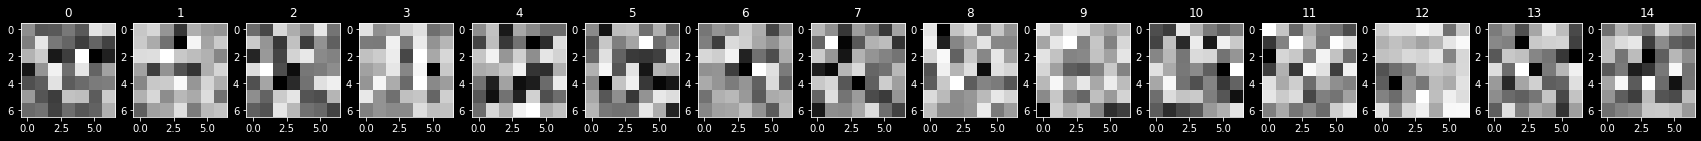

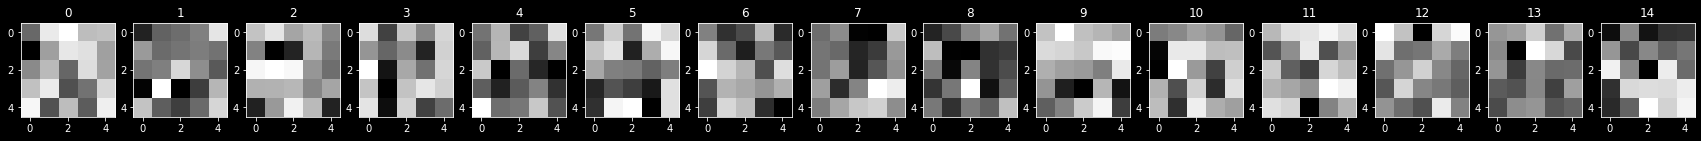

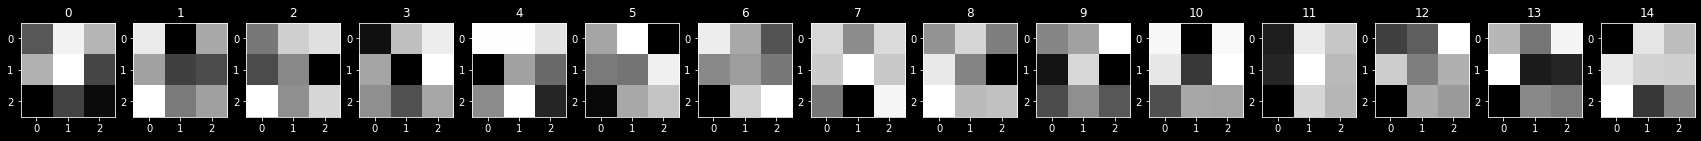

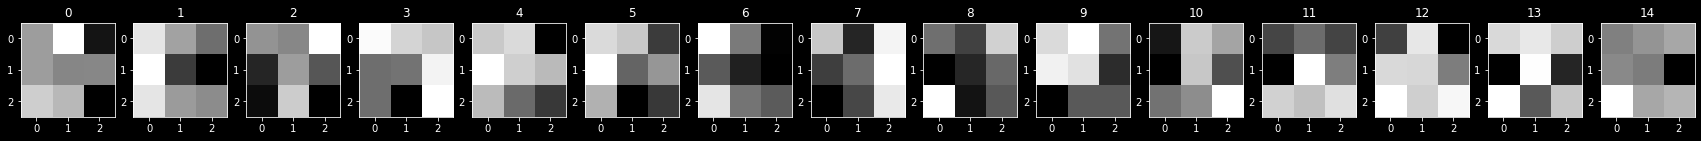

In [ ]:
def plot_conv_weights(model, layer):
    W = model.get_layer(name=layer).get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        print(W.shape)
        if len(W.shape) == 4:
            W = W.reshape(W.shape[0], W.shape[1], W.shape[2] * W.shape[3]) 
        else:
            W = W.reshape(W.shape[0], W.shape[1], W.shape[2]) 
        fig, axs = plt.subplots(1,15, figsize=(30,30))
        # fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(15):
            axs[i].imshow(W[:,:,i], cmap='Greys_r')
            axs[i].set_title(str(i))

for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    else:
        plot_conv_weights(model, layer.name)

In [ ]:
# plt.figure(figsize=[10,2])

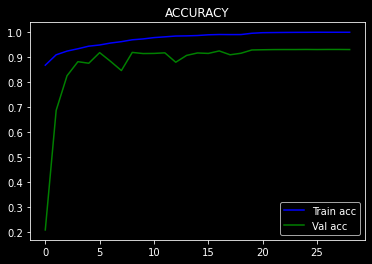

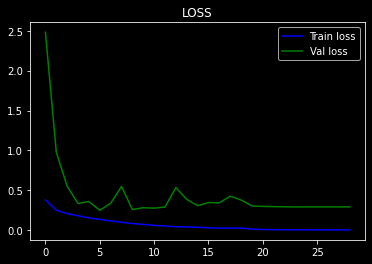

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = model_train['accuracy']
val_acc = model_train['val_accuracy']
loss = model_train['loss']
val_loss = model_train['val_loss']
epoch_count = range(len(acc))

plt.plot(epoch_count, acc, 'b', label='Train acc')
plt.plot(epoch_count, val_acc, 'g', label='Val acc')
plt.title('ACCURACY')
plt.legend()
plt.figure()

plt.plot(epoch_count, loss, 'b', label='Train loss')
plt.plot(epoch_count, val_loss, 'g', label='Val loss')
plt.title('LOSS')
plt.legend()
plt.figure()

plt.show()